In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

In [2]:
import torch
from torch.utils.data import DataLoader
from net import FingeralphabetNet
from preprocess import FingeralphabetTestset
import os
import random

In [3]:
plt.rcParams['figure.figsize'][0], plt.rcParams['figure.figsize'][1] = [12, 6]

In [11]:
def heatmapbw(path, *args, print_acc=False, **kwargs):
    nn = FingeralphabetNet()
    nn.load_state_dict(torch.load(path))
    
    abc = [chr(i) for i in range(ord("A"), ord("Z")+1)] + ["SPACE"]
    total_data = pd.DataFrame(0, columns=abc, index=abc)
    acc = 0
    for fn in os.listdir('../genLetts_py/new_test'):
        if fn == '.DS_Store':
            continue
        img = get_input('../genLetts_py/new_test/' + fn)
        guess = letterbw(nn(img.unsqueeze(0).unsqueeze(0))[0])[0][0]
        true = fn[0] if fn[:5] != 'SPACE' else 'SPACE'
        total_data.at[true, guess] = total_data.at[true, guess] + 1
        acc += int(guess[0][0] == fn[0] or guess[0][0] == fn[:5])
        
    num = len(os.listdir('../genLetts_py/new_test'))
    if print_acc:
        print(acc, 'correct out of', num, 'tries!', 'Accuracy:', str(acc/num*100) + '%')
    
    perc_data = total_data.copy()
    for ind in perc_data.index:
        perc_data.loc[ind] = perc_data.loc[ind] / perc_data.loc[ind].sum() * 100
    
    sns.heatmap(perc_data, center=50) 
    plt.ylabel("True")
    plt.xlabel("Guess")
    
    return acc/num, perc_data

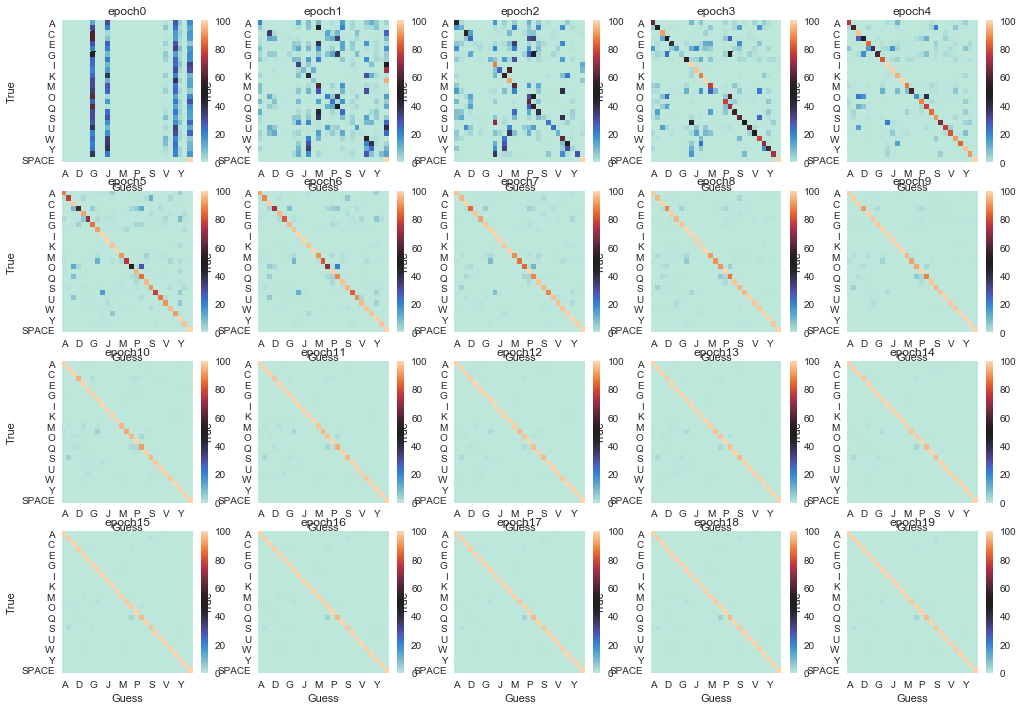

In [14]:
plt.rcParams['figure.figsize'][0], plt.rcParams['figure.figsize'][1] = [17, 12]
for i in range(20):
    #print(i)
    plt.subplot(4, 5, i+1)
    plt.title("epoch" + str(i))
    heatmapbw('Nets/100epochs/' + str(i))
    

In [7]:
def letterFA(arr, count=1):
    """
    returns the top count letters of an output of the net
    """
    maxes = [0 for i in range(count)]
    indexes = [0 for i in range(count)]

    for i, x in enumerate(arr):
        if x > min(maxes):
            indexes[maxes.index(min(maxes))] = i
            maxes[maxes.index(min(maxes))] = x
    
    abc = [chr(i) for i in range(ord("A"), ord("Z")+1)] + ["SCH", "CH", "NOTHING"] 
    return [abc[i] for i in indexes], maxes

In [13]:
nn = FingeralphabetNet()
nn.load_state_dict(torch.load('Nets/100epochs/0/1'))
acc = 0
for i, fn in enumerate(os.listdir('../dataset/test/')):
    if i == 1000:
        break
    if fn == '.DS_Store':
        continue
    img = get_input('../dataset/test/' + fn)
    guess = letterfa(nn(img.unsqueeze(0))[0])
    #print('guess:', *[guess[0][i] + ': ' + str(guess[1][i].item()) for i in range(len(guess[0]))])
    if fn[1].isdigit():
        acc += int(guess[0][0] == fn[0])
    else:
        acc += int(guess[0][0] == fn[:2] or guess[0][0] == fn[:3] or guess[0][0] == fn[:7])
print(acc, 'correct out of', 1000, 'tries!', 'Accuracy:', str(acc/1000*100) + '%')

32 correct out of 1000 tries! Accuracy: 3.2%


In [15]:
def testNN(nn, img_dir, count):
    dataloader = DataLoader(FingeralphabetTestset(img_dir, count), batch_size=32, shuffle=True)
    abc = [chr(i) for i in range(ord("A"), ord("Z")+1)] + ["SCH", "CH", "NOTHING"]
    confusion_matrix = pd.DataFrame(0, columns=abc, index=abc)
    acc = 0
    lsdir = os.listdir(img_dir)
    for i, sample_batched in enumerate(dataloader):
        outputs = nn(sample_batched['image_tensor'])
        target_inds = sample_batched['target_ind']
        for i in range(outputs.shape[0]):
            output_ls = list(outputs[i])
            output_ind = output_ls.index(max(output_ls))
            target_ind = int(target_inds[i])
            output_letter = abc[output_ind]
            target_letter = abc[target_ind]
            confusion_matrix.at[target_letter, output_letter] += 1
            
    print('{} correct out of {} tries! Accuracy: {}%'.format(acc, count, acc/count*100))
    return confusion_matrix, acc/count

In [14]:
nn = FingeralphabetNet()
nn.load_state_dict(torch.load('Nets/100epochs/1'))
data, acc = testNN(nn, '../dataset/test', 100)

In [26]:
def visualize_results(data, **kwargs):
    for ind in data.index:
        data.loc[ind] = data.loc[ind] / data.loc[ind].sum() * 100
    
    sns.heatmap(data, **kwargs) 
    plt.ylabel("True")
    plt.xlabel("Guess")

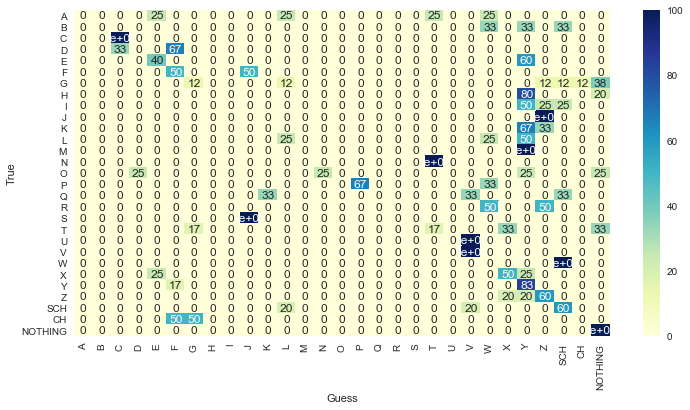

In [30]:
visualize_results(data, annot=True, cmap="YlGnBu")

In [ ]:
nn.load_state_dict(torch.load('my_file.pt', map_location=lambda storage, loc: storage))

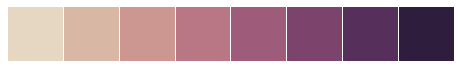

In [39]:
sns.palplot(sns.cubehelix_palette(8, start=3, rot=0.5))

In [73]:
plt.rcParams['figure.figsize'][0], plt.rcParams['figure.figsize'][1] = [17, 12]
def showResCSV(path, **kwargs):
    data = pd.read_csv(path, index_col = 0)
    data = data.astype(int)
    for ind in data.index:
            data.loc[ind] = data.loc[ind] / data.loc[ind].sum() * 100
    plt.ylabel("True")
    plt.xlabel("Guess")
    sumAcc = 0
    for ind in data:
        sumAcc += data.at[ind, ind]
    sns.heatmap(data, **kwargs)
    return data, sumAcc/29

ep0's Accuracy: 3.8505747126436787
ep5's Accuracy: 37.94252873563219
ep10's Accuracy: 39.48275862068966
ep15's Accuracy: 37.597701149425276
ep20's Accuracy: 35.01149425287356
ep25's Accuracy: 31.229885057471268
ep30's Accuracy: 36.98850574712643
ep35's Accuracy: 39.183908045977006
ep40's Accuracy: 36.5632183908046
ep45's Accuracy: 30.24137931034482
ep50's Accuracy: 33.55172413793103
ep55's Accuracy: 33.678160919540225
ep60's Accuracy: 33.48275862068965
ep65's Accuracy: 34.49425287356321
ep70's Accuracy: 37.356321839080465
ep75's Accuracy: 37.52873563218391
ep80's Accuracy: 35.96551724137931
ep85's Accuracy: 36.6551724137931
ep90's Accuracy: 34.7816091954023
ep95's Accuracy: 35.05747126436782


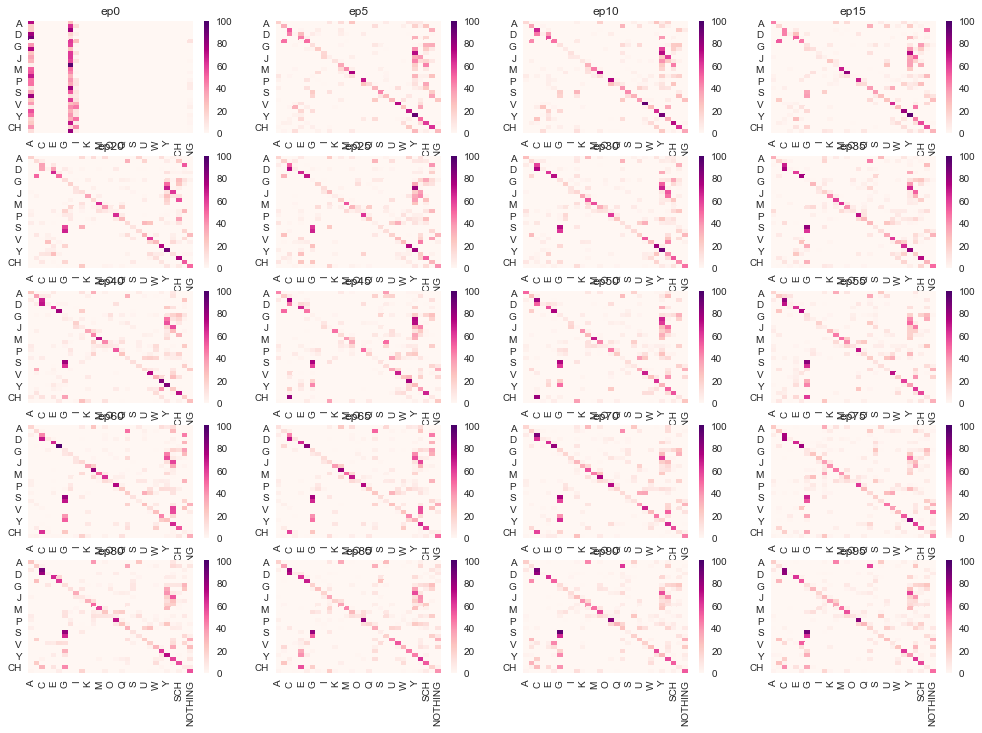

In [75]:
for i in range(0, 100, 5):
    plt.subplot(5, 4, (i/5)+1)
    plt.title('ep{}'.format(i))
    d, acc = showResCSV('testResults/ep{}.csv'.format(i), cmap="RdPu", vmin=0, vmax=100)
    print("ep{}'s Accuracy: {}".format(i, acc))